Load the housing prices data from Thinkful's database.


In [11]:
%reload_ext nb_black


import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

from sqlalchemy import create_engine

import warnings

import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

warnings.filterwarnings("ignore")
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "houseprices"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)
house_df = pd.read_sql_query("select * from houseprices", con=engine)

engine.dispose()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Split your data into train and test sets.


In [2]:
house_df = pd.concat([house_df, pd.get_dummies(house_df.housestyle)], axis=1)
dummy = list(pd.get_dummies(house_df.housestyle).columns)
X = house_df[["overallqual", "grlivarea", "garagecars"] + dummy]

<IPython.core.display.Javascript object>

In [3]:
X = X[
    [
        "overallqual",
        "grlivarea",
        "garagecars",
        "1.5Fin",
        "1Story",
        "2.5Fin",
        "2.5Unf",
        "2Story",
        "SFoyer",
    ]
]
Y = house_df["saleprice"]

<IPython.core.display.Javascript object>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=27
)
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.


In [8]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     527.3
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:46:17   Log-Likelihood:                -17484.
No. Observations:                1460   AIC:                         3.499e+04
Df Residuals:                    1450   BIC:                         3.504e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.13e+05   6277.246    -18.005      0.000   -1.25e+05   -1.01e+05
overallqual  2.593e+04   1031.701     25.137      0.000    2.39e+04     2.8e+04
grlivarea      70.7127      2.939     24.060      0.000      64.948      76.478
garagecars   1.646e+04   1773.772      9.277      0.000     1.3e+04    1.99e+04
1.5Fin      -1.579e+04   5481.682     -2.881      0.004   -2.65e+04   -5039.596
1Story       1.325e+04   4571.239      2.898      0.004    4280.913    2.22e+04
2.5Fin      -5.838e+04    1.5e+04     -3.897      0.000   -8.78e+04    -2.9e+04
2.5Unf       -5.82e+04   1.25e+04     -4.642      0.000   -8.28e+04   -3.36e+04
2Story      -1.655e+04   4911.176     -3.370      0.001   -2.62e+04   -6915.939
SFoyer       1.583e+04   7719.674      2.051      0.040     690.285     3.1e+04
==============================================================================
Omnibus:                      358.053   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19899.291
Skew:                           0.068   Prob(JB):                         0.00
Kurtosis:                      21.086   Cond. No.                     2.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.


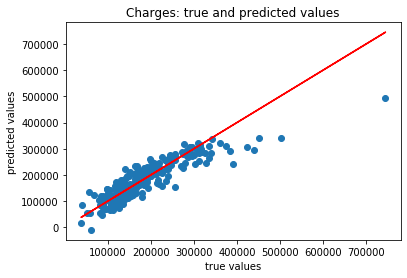

Mean absolute error of the prediction is: 25566.437051674726
Mean squared error of the prediction is: 1399144142.8978183
Root mean squared error of the prediction is: 37405.13524768783
Mean absolute percentage error of the prediction is: 15.63186074172992


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = model.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print(
    "Mean absolute error of the prediction is: {}".format(
        mean_absolute_error(y_test, y_preds)
    )
)
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print(
    "Mean absolute percentage error of the prediction is: {}".format(
        np.mean(np.abs((y_test - y_preds) / y_test)) * 100
    )
)